<a href="https://www.kaggle.com/code/moiseienkoom/hw-10?scriptVersionId=211367983" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [45]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

!pip install -q optuna

import lightgbm as lgb
from sklearn import metrics

In [15]:
df = pd.read_csv('/kaggle/input/playground-series-s3e25/train.csv')

In [16]:
df.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [7]:
df.isnull().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [12]:
df.describe()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


In [17]:
df = df.drop(columns=['id'])
df

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457,6.0
1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.71760,6.5
2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.50633,2.5
3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.78937,6.0
4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.86481,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10402,128.0,7.558488,12.000000,4.000000,26.385218,11.330440,2.644000,1.631000,0.892000,0.496070,1.79607,4.0
10403,30.0,1.743160,10.000000,5.333333,20.766935,14.163933,3.090000,1.556667,0.866667,0.480390,0.81480,5.0
10404,196.0,30.920000,24.500000,5.500000,53.490297,10.074300,2.295000,1.545000,1.120000,0.469715,2.11540,1.8
10405,38.0,1.553160,12.666667,4.666667,26.621687,11.290033,2.743333,1.756667,0.980000,0.486507,0.77755,6.0


In [21]:
num_features = df.select_dtypes(include=[np.number]).columns
num_features

Index(['allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average', 'Hardness'],
      dtype='object')

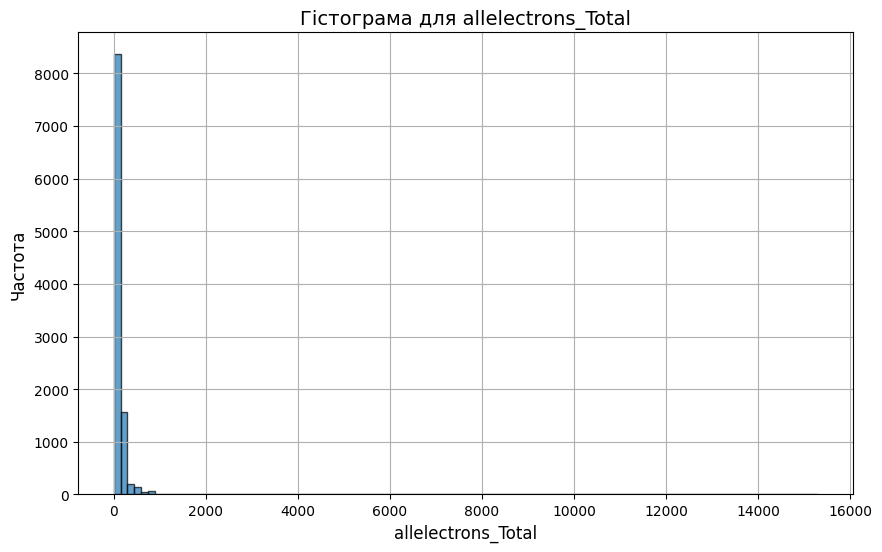

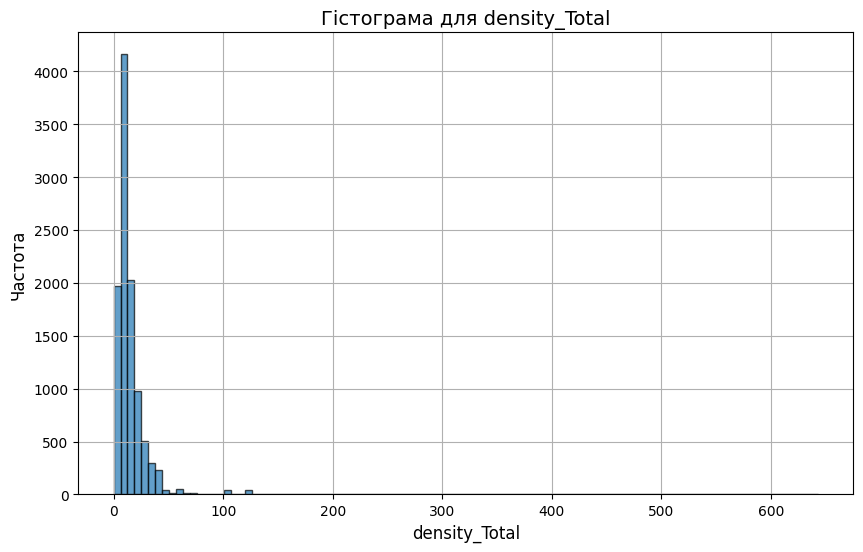

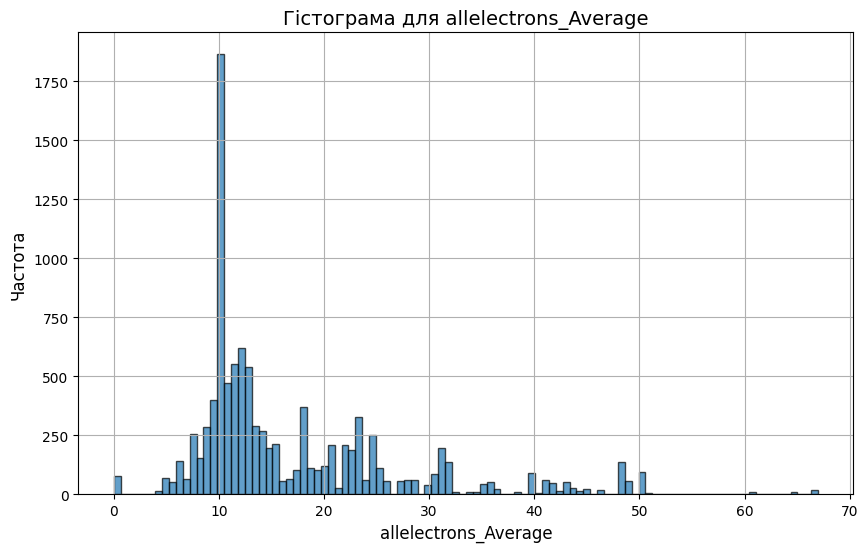

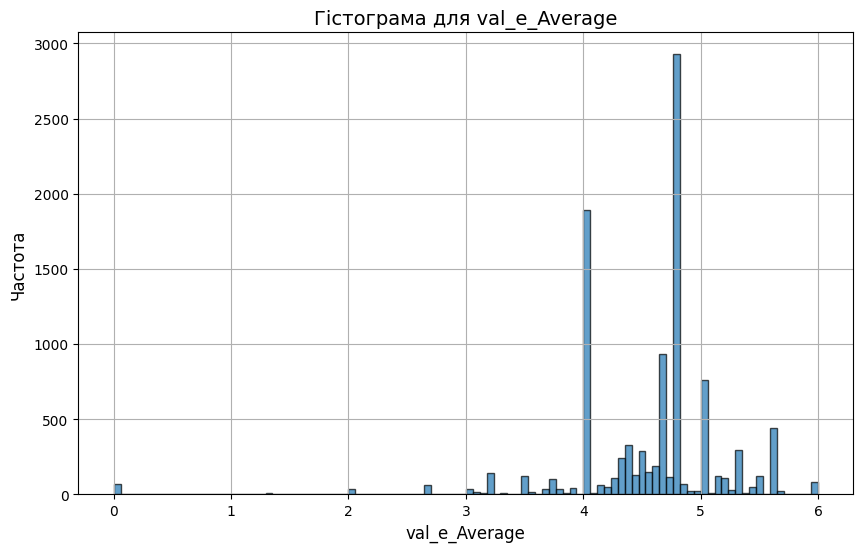

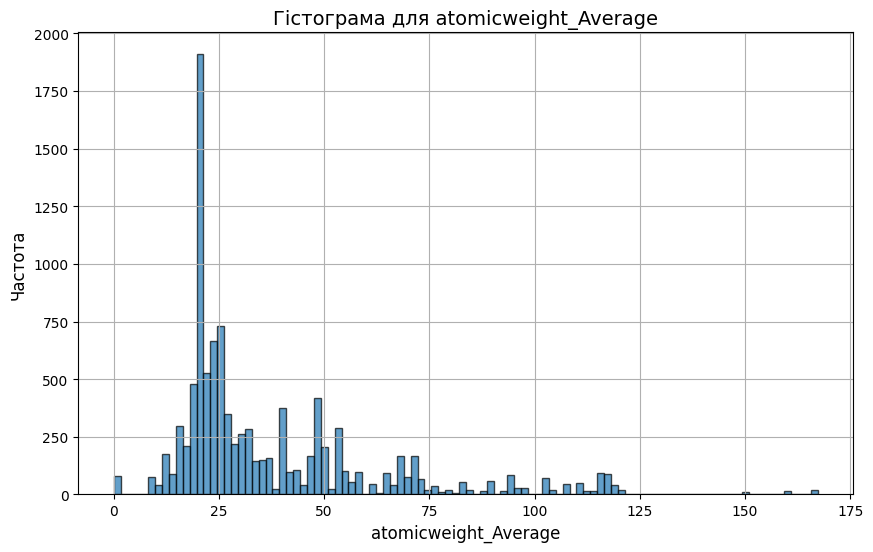

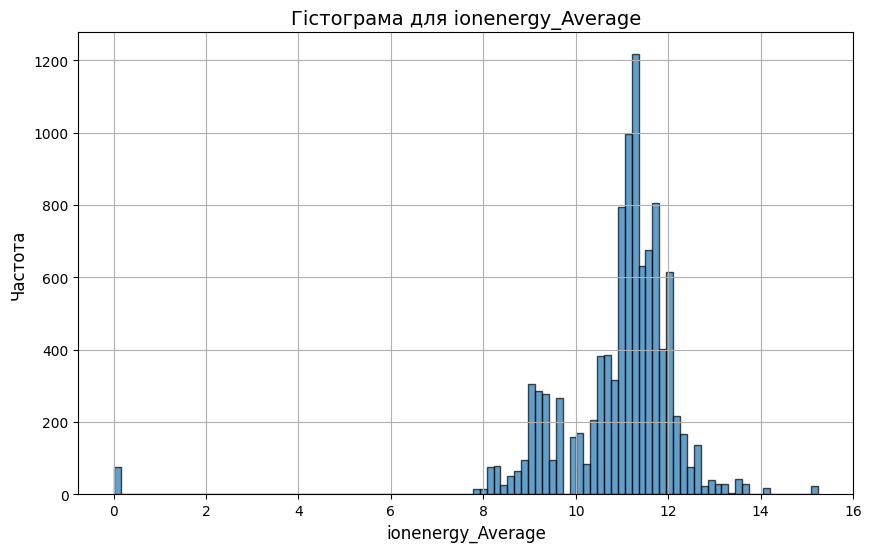

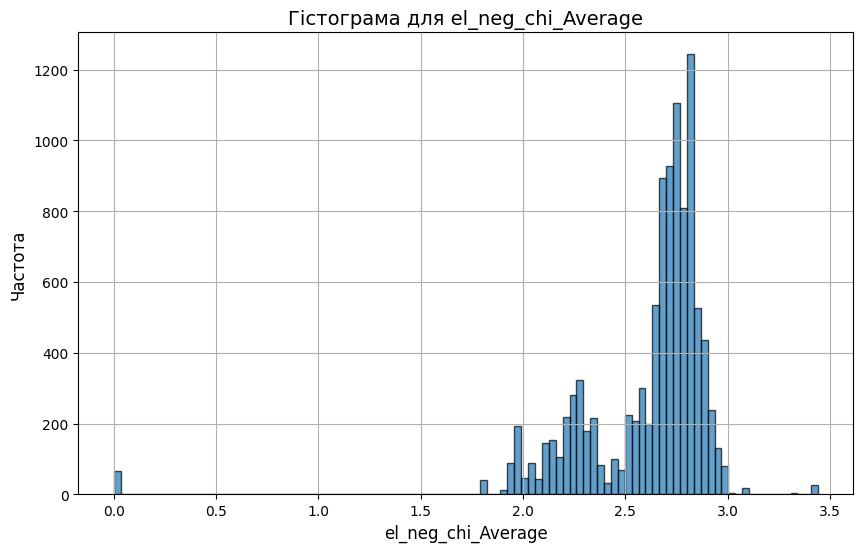

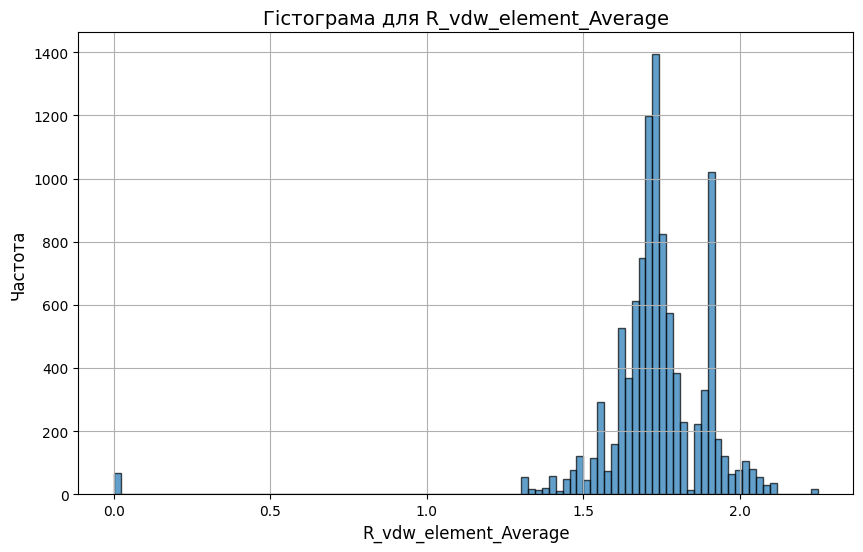

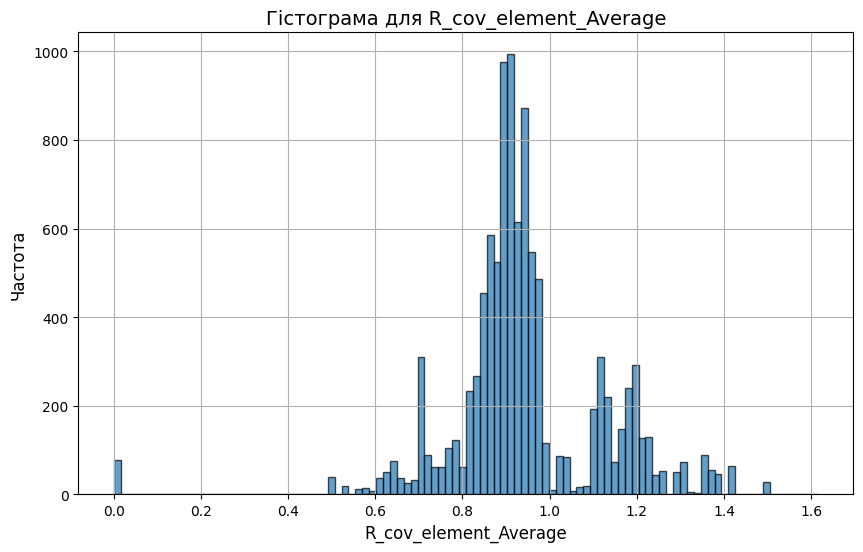

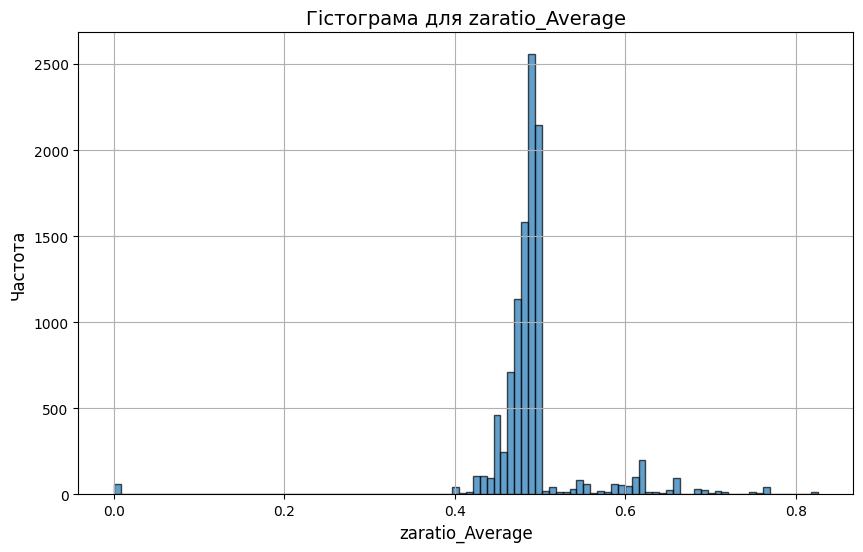

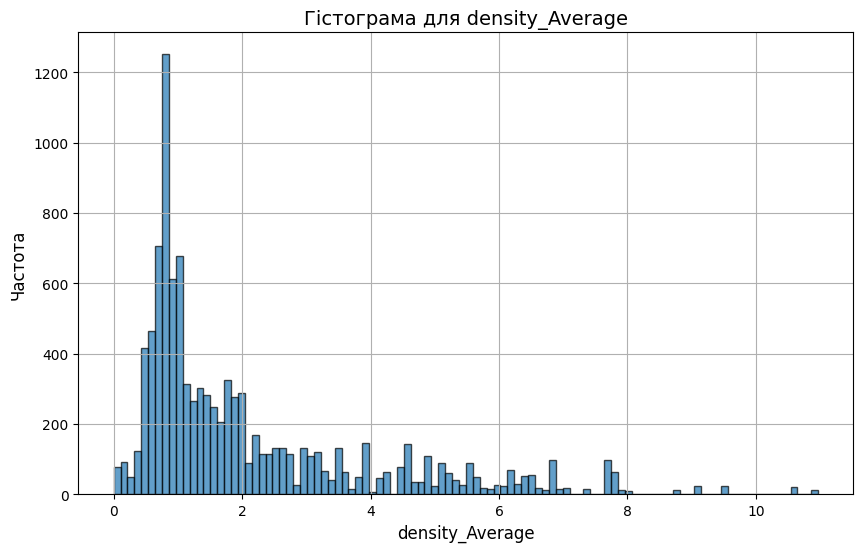

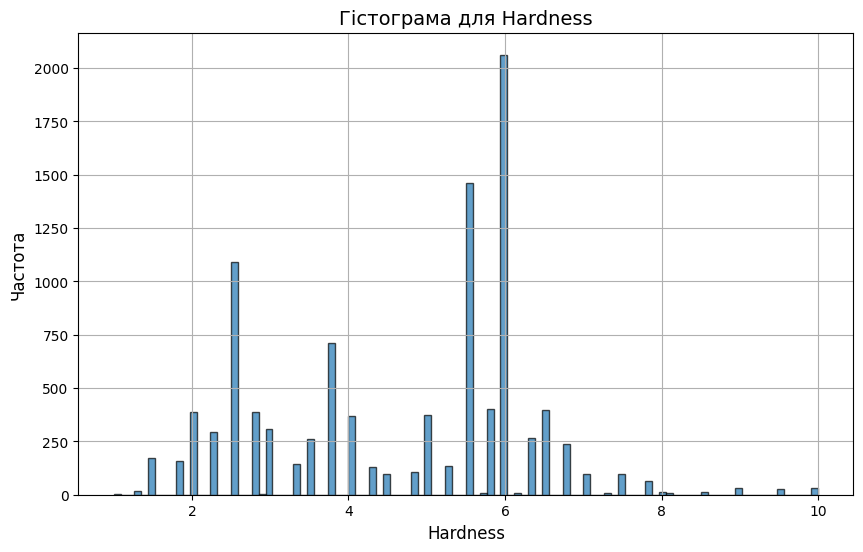

In [31]:
num_bins = int(np.sqrt(len(df)))
for col in num_features:
    plt.figure(figsize=(10, 6))
    
    # Вибір непустих значень
    col_data = df[col].dropna()
    
    # Створення гістограми
    counts, bin_edges = np.histogram(col_data, bins=num_bins)
    plt.hist(col_data, bins=num_bins, edgecolor='k', alpha=0.7)
    plt.title(f'Гістограма для {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Частота', fontsize=12)
    plt.grid(True)
    plt.show()

In [32]:
y = df['Hardness']
X = df.drop(columns='Hardness')

In [33]:
y.describe()

count    10407.000000
mean         4.647126
std          1.680525
min          1.000000
25%          3.000000
50%          5.500000
75%          6.000000
max         10.000000
Name: Hardness, dtype: float64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  train_size=0.8/0.9,
                                                  random_state=42)

print(f'Train: {X_train.shape[0]} - {round(X_train.shape[0] / X.shape[0] * 100)}%')
print(f'Test:  {X_test.shape[0]} - {round(X_test.shape[0] / X.shape[0] * 100)}%')
print(f'Val:   {X_val.shape[0]} - {round(X_val.shape[0] / X.shape[0] * 100)}%')


Train: 8325 - 80%
Test:  1041 - 10%
Val:   1041 - 10%


In [39]:
num_columns = X.select_dtypes(include="number").columns

# Створюємо pipeline для числових ознак
num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))]
)

# Створюємо preprocessor тільки для числових ознак
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
    ]
)

# Використовуємо pandas для виводу
preprocessor.set_output(transform='pandas')

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average'],
      dtype='object'))])

In [40]:
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

In [47]:
def objective(trial):

  # 1. Визначення гіперпараметрів:

  model = lgb.LGBMRegressor(
        n_estimators = 30,
        verbose = -1,
        max_depth = trial.suggest_int('max_depth', 4, 30),
        lambda_l1 = trial.suggest_float('lambda_l1', 1e-5, 1, log=True),
        lambda_l2 = trial.suggest_float('lambda_l2', 1e-5, 1, log=True),
        num_leaves = trial.suggest_int('num_leaves', 5, 120),
        objective = trial.suggest_categorical('objective', ['mse', 'mae', 'huber']),
        alpha = trial.suggest_float('alpha', 1, 10, log=True)
  )

  # train


  # 3. Навчання моделі на тренувальному наборі даних:

  model.fit(X_train, y_train)

  # 4. Оцінка моделі на тестовому наборі даних:

  y_pred = model.predict(X_val)
  r2 = metrics.r2_score(y_val, y_pred)

  # 5. Повернення значення метрики:
  return r2

In [48]:
import optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2024-12-05 11:13:26,104] A new study created in memory with name: no-name-c21291be-3fab-4c73-92fa-06a893046c4d
[I 2024-12-05 11:13:26,388] Trial 0 finished with value: 0.47026927855961886 and parameters: {'max_depth': 21, 'lambda_l1': 0.027274764557755293, 'lambda_l2': 5.0501428314912925e-05, 'num_leaves': 61, 'objective': 'mse', 'alpha': 4.907764461146515}. Best is trial 0 with value: 0.47026927855961886.
[I 2024-12-05 11:13:26,525] Trial 1 finished with value: 0.47556269583956134 and parameters: {'max_depth': 13, 'lambda_l1': 0.19513241113020754, 'lambda_l2': 4.3058696899734894e-05, 'num_leaves': 71, 'objective': 'huber', 'alpha': 8.045022999099414}. Best is trial 1 with value: 0.47556269583956134.
[I 2024-12-05 11:13:26,724] Trial 2 finished with value: 0.45705871034391543 and parameters: {'max_depth': 25, 'lambda_l1': 0.34488920383962124, 'lambda_l2': 0.0349949202379991, 'num_leaves': 114, 'objective': 'mae', 'alpha': 3.0651477848346214}. Best is trial 1 with value: 0.4755626958

In [49]:
study.best_params

{'max_depth': 11,
 'lambda_l1': 0.00017774644961807186,
 'lambda_l2': 0.0014104702659730524,
 'num_leaves': 70,
 'objective': 'mse',
 'alpha': 9.952229561793395}

In [50]:
best_params = study.best_params

model = lgb.LGBMRegressor(**best_params,
                          n_estimators = 30,
                          verbose=-1)

model.fit(X_train, y_train,
          eval_set=[(X_test, y_test), (X_train, y_train)],
          eval_metric='mae')

LGBMRegressor(alpha=9.952229561793395, lambda_l1=0.00017774644961807186,
              lambda_l2=0.0014104702659730524, max_depth=11, n_estimators=30,
              num_leaves=70, objective='mse', verbose=-1)

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l1'>

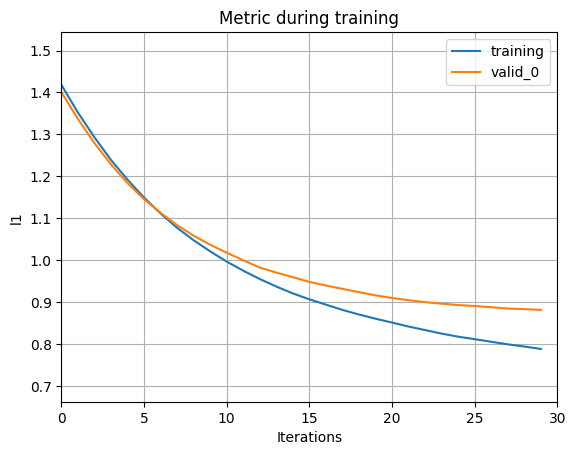

In [51]:
lgb.plot_metric(model,
                metric='l1')

In [52]:
def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [53]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,0.79,0.88
RMSE,1.05,1.16
R2,0.61,0.52


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

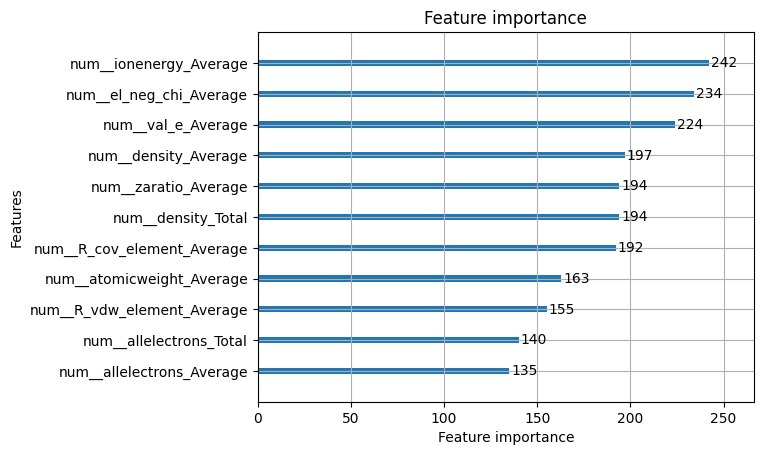

In [56]:
optuna.visualization.plot_param_importances(study)
lgb.plot_importance(model)

In [57]:
len(model.evals_result_['training']['l1'])

30